#Algoritma Ant Colony Optimization (ACO) untuk Menentukan Rute Optimal Ziarah Kubra di Kota Palembang

In [30]:
# Import library
import numpy as np
import random
import pandas as pd

# Biar hasilnya selalu sama
random.seed(42)
np.random.seed(42)

# Aturan semut
alpha = 1
beta = 5
tau0 = 0.1
jumlah_semut = 3

# Daftar lokasi ziarah (node)
node = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Jarak antar node
jarak = np.array([
    [0, 2, 2, 1, 2, 1.3, 1.7],
    [2, 0, 0.052, 3, 0.085, 2.4, 2.8],
    [2, 0.052, 0, 3.1, 0.09, 2.5, 2.9],
    [1, 3, 3.1, 0, 3, 2.3, 2.3],
    [2, 0.085, 0.09, 3, 0, 2.4, 2.8],
    [1.3, 2.4, 2.5, 2.3, 2.4, 0, 1],
    [1.7, 2.8, 2.9, 2.3, 2.8, 1, 0]
])

jumlah_node = len(node)

# Hitung visibilitas: makin dekat makin besar
visibilitas = 1 / jarak
visibilitas[jarak == 0] = 0  # Biar gak dibagi 0

# Awal pheromone semua sama
pheromon = np.full_like(jarak, tau0)

# Tampilkan tabel heuristik dan pheromone awal
print("Matriks Heuristik Awal (η = 1 / jarak):")
print(pd.DataFrame(visibilitas, columns=node, index=node).round(4))

print("\nMatriks Pheromone Awal (τ0):")
print(pd.DataFrame(pheromon, columns=node, index=node).round(4))

# Simulasi semua semut
rute_semua_semut = []

for semut in range(jumlah_semut):
    print(f"\n{'='*66}")
    print(f"SEMUT {semut+1}")
    print(f"{'='*66}\n")

    sekarang = 0  # Mulai dari node A (index 0)
    sudah_dikunjungi = [sekarang]
    tabu = set(sudah_dikunjungi)

    while len(sudah_dikunjungi) < jumlah_node:
        nilai_prob = []
        kandidat = []

        # Cek semua node yang belum dikunjungi
        for tujuan in range(jumlah_node):
            if tujuan not in tabu:
                tau = pheromon[sekarang][tujuan]
                eta = visibilitas[sekarang][tujuan]
                nilai = (tau ** alpha) * (eta ** beta)
                nilai_prob.append(nilai)
                kandidat.append(tujuan)

        # Hitung probabilitas
        total = sum(nilai_prob)
        probabilitas = [n / total for n in nilai_prob]
        kumulatif = np.cumsum(probabilitas)

        # Cetak langkah
        print(f"Langkah dari node {node[sekarang]}:")
        for i in range(len(kandidat)):
            print(f"  Ke node {node[kandidat[i]]}: τ·η^β = {nilai_prob[i]:.5f}, Prob = {probabilitas[i]:.3f}, Kumulatif = {kumulatif[i]:.3f}")

        r = random.random()
        print(f"Bilangan acak r = {r:.4f}")

        # Pilih node berdasarkan probabilitas
        for i, prob in enumerate(kumulatif):
            if r <= prob:
                node_selanjutnya = kandidat[i]
                break

        print(f"Semut memilih node {node[node_selanjutnya]} berdasarkan r = {r:.4f}\n")

        sudah_dikunjungi.append(node_selanjutnya)
        tabu.add(node_selanjutnya)
        sekarang = node_selanjutnya

    # Kembali ke node awal
    sudah_dikunjungi.append(0)

    # Cetak rute akhir semut
    rute_node = [node[i] for i in sudah_dikunjungi]
    print(f"Rute akhir semut {semut+1}: {', '.join(rute_node)}")

    # Hitung total jarak
    jarak_total = 0
    for i in range(len(sudah_dikunjungi)-1):
        asal = sudah_dikunjungi[i]
        tujuan = sudah_dikunjungi[i+1]
        jarak_total += jarak[asal][tujuan]

    print(f"Total jarak yang ditempuh semut {semut+1}: {jarak_total:.2f} km\n")

    rute_semua_semut.append(rute_node)

Matriks Heuristik Awal (η = 1 / jarak):
        A        B        C       D        E       F       G
A  0.0000   0.5000   0.5000  1.0000   0.5000  0.7692  0.5882
B  0.5000   0.0000  19.2308  0.3333  11.7647  0.4167  0.3571
C  0.5000  19.2308   0.0000  0.3226  11.1111  0.4000  0.3448
D  1.0000   0.3333   0.3226  0.0000   0.3333  0.4348  0.4348
E  0.5000  11.7647  11.1111  0.3333   0.0000  0.4167  0.3571
F  0.7692   0.4167   0.4000  0.4348   0.4167  0.0000  1.0000
G  0.5882   0.3571   0.3448  0.4348   0.3571  1.0000  0.0000

Matriks Pheromone Awal (τ0):
     A    B    C    D    E    F    G
A  0.1  0.1  0.1  0.1  0.1  0.1  0.1
B  0.1  0.1  0.1  0.1  0.1  0.1  0.1
C  0.1  0.1  0.1  0.1  0.1  0.1  0.1
D  0.1  0.1  0.1  0.1  0.1  0.1  0.1
E  0.1  0.1  0.1  0.1  0.1  0.1  0.1
F  0.1  0.1  0.1  0.1  0.1  0.1  0.1
G  0.1  0.1  0.1  0.1  0.1  0.1  0.1

SEMUT 1

Langkah dari node A:
  Ke node B: τ·η^β = 0.00313, Prob = 0.022, Kumulatif = 0.022
  Ke node C: τ·η^β = 0.00313, Prob = 0.022, Kumulatif

<ipython-input-30-f66ddf8b5c71>:32: RuntimeWarning: divide by zero encountered in divide
  visibilitas = 1 / jarak


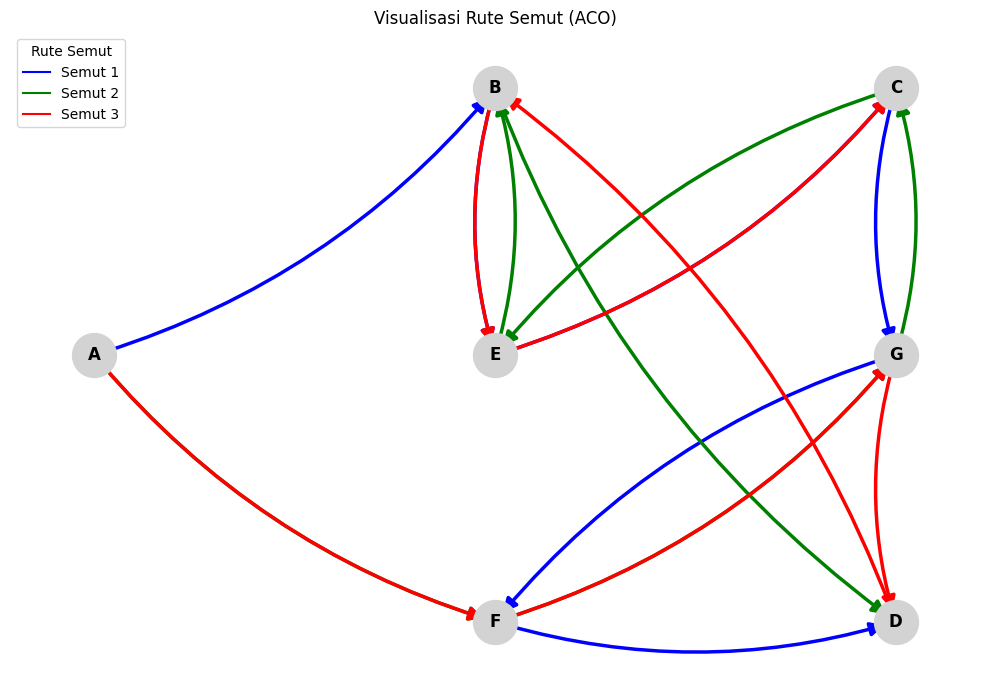

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Koordinat manual untuk tata letak agar bentuk visual mudah dibaca
positions = {
    'A': (0, 2),
    'B': (2, 4),
    'C': (4, 4),
    'D': (4, 0),
    'E': (2, 2),
    'F': (2, 0),
    'G': (4, 2),
}

# Buat directed graph (karena rutenya berarah)
G = nx.DiGraph()

# Tambahkan node
for city in city_names:
    G.add_node(city)

# Warna berbeda untuk tiap semut
colors = ['blue', 'green', 'red']
labels = [f'Semut {i+1}' for i in range(len(ant_routes))]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos=positions, node_size=1000, node_color='lightgray')
nx.draw_networkx_labels(G, pos=positions, font_size=12, font_weight='bold')

# Gambar rute tiap semut
for i, route in enumerate(ant_routes):
    edge_list = [(route[j], route[j+1]) for j in range(len(route)-1)]
    nx.draw_networkx_edges(
        G, pos=positions, edgelist=edge_list, edge_color=colors[i],
        width=2.5, arrows=True, arrowsize=20, connectionstyle="arc3,rad=0.15",
        label=labels[i]
    )

# Tambahkan legend manual
for i in range(len(ant_routes)):
    plt.plot([], [], color=colors[i], label=labels[i])

plt.legend(title="Rute Semut", loc='upper left')
plt.title("Visualisasi Rute Semut (ACO)")
plt.axis('off')
plt.tight_layout()
plt.show()


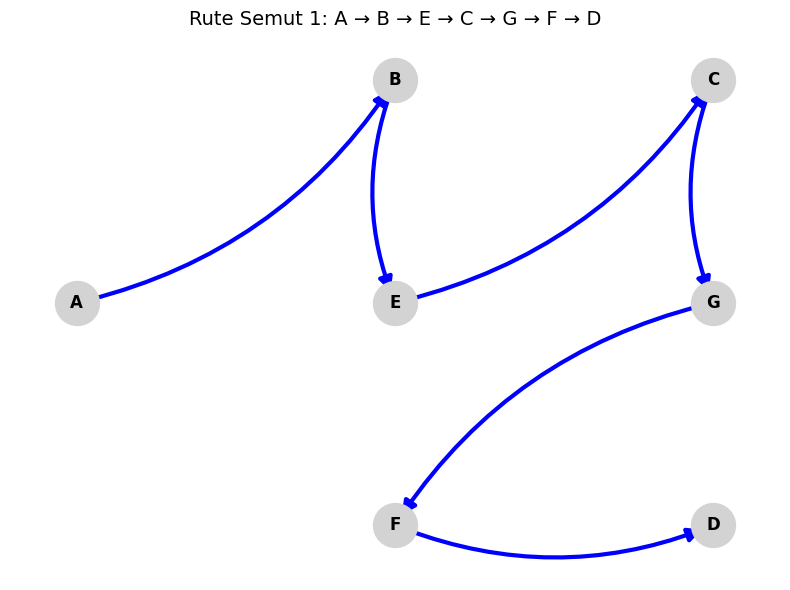

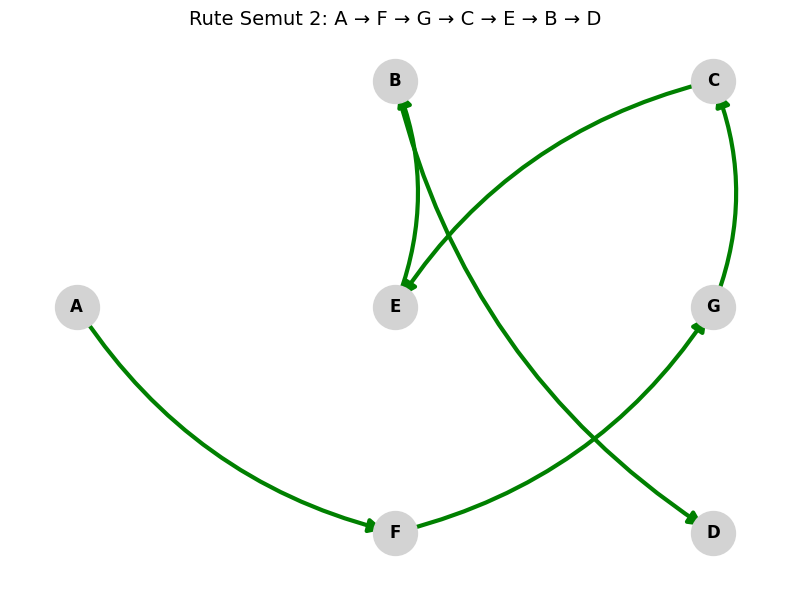

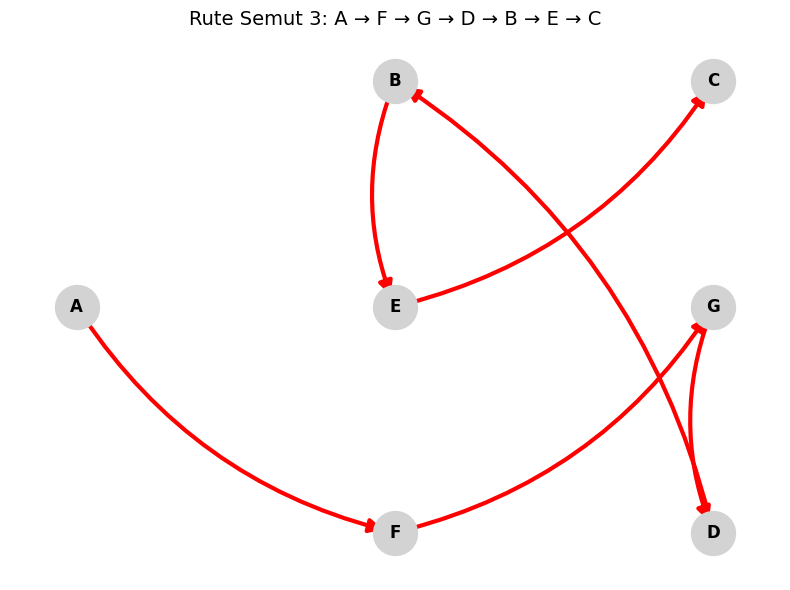

In [27]:
# Loop untuk membuat 3 grafik
for i, route in enumerate(ant_routes):
    G = nx.DiGraph()
    G.add_nodes_from(city_names)

    edge_list = [(route[j], route[j+1]) for j in range(len(route)-1)]

    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos=positions, node_size=1000, node_color='lightgray')
    nx.draw_networkx_labels(G, pos=positions, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(
        G, pos=positions, edgelist=edge_list, edge_color=colors[i],
        width=3, arrows=True, arrowsize=20, connectionstyle="arc3,rad=0.2"
    )

    plt.title(f"Rute Semut {i+1}: {' → '.join(route)}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
